<a href="https://colab.research.google.com/github/Rogire/Algoritmos-Python/blob/main/MAC011_Lista_Ajuste_Parametros_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lista Ajuste de Parametros

Nome: Igor Correa Trifilio Campos

Matricula: 202365092A

Faça um ajuste de parametros para encontrar uma função na forma

\begin{equation}
f(x) = c_0 + c_1cos(x) + c_2sen(x) + c_3cos(2x) + c_4sen(2x) + c_5cos(3x) + c_6sen(3x)
\end{equation}
isto é utilize a Evolução Diferencial para descobrir os valores de $c_0, c_1,\cdots, c_6$ que ajuste a função $f(x)$ aos dados abaixo. Teste as normas 1, 2 e infinito no calculo do erro relativo e mostre os resultados do ajuste. Qual ficou melhor?



In [ ]:
%%writefile dados.txt
0.000000000000000000e+00 2.004008016032064049e-02 4.008016032064128098e-02 6.012024048096192147e-02 8.016032064128256196e-02 1.002004008016031955e-01 1.202404809619238429e-01 1.402805611222444904e-01 1.603206412825651239e-01 1.803607214428857575e-01 2.004008016032063910e-01 2.204408817635270523e-01 2.404809619238476859e-01 2.605210420841683194e-01 2.805611222444889807e-01 3.006012024048095865e-01 3.206412825651302478e-01 3.406813627254509091e-01 3.607214428857715149e-01 3.807615230460921762e-01 4.008016032064127820e-01 4.208416833667334433e-01 4.408817635270541047e-01 4.609218436873747105e-01 4.809619238476953718e-01 5.010020040080159776e-01 5.210420841683366389e-01 5.410821643286573002e-01 5.611222444889779615e-01 5.811623246492986228e-01 6.012024048096191731e-01 6.212424849699398344e-01 6.412825651302604957e-01 6.613226452905811570e-01 6.813627254509018183e-01 7.014028056112223686e-01 7.214428857715430299e-01 7.414829659318636912e-01 7.615230460921843525e-01 7.815631262525050138e-01 8.016032064128255641e-01 8.216432865731462254e-01 8.416833667334668867e-01 8.617234468937875480e-01 8.817635270541082093e-01 9.018036072144288706e-01 9.218436873747494209e-01 9.418837675350700822e-01 9.619238476953907435e-01 9.819639278557114048e-01 1.002004008016031955e+00 1.022044088176352616e+00 1.042084168336673278e+00 1.062124248496993939e+00 1.082164328657314600e+00 1.102204408817635262e+00 1.122244488977955923e+00 1.142284569138276584e+00 1.162324649298597246e+00 1.182364729458917685e+00 1.202404809619238346e+00 1.222444889779559007e+00 1.242484969939879669e+00 1.262525050100200330e+00 1.282565130260520991e+00 1.302605210420841653e+00 1.322645290581162314e+00 1.342685370741482975e+00 1.362725450901803637e+00 1.382765531062124298e+00 1.402805611222444737e+00 1.422845691382765398e+00 1.442885771543086060e+00 1.462925851703406721e+00 1.482965931863727382e+00 1.503006012024048044e+00 1.523046092184368705e+00 1.543086172344689366e+00 1.563126252505010028e+00 1.583166332665330689e+00 1.603206412825651128e+00 1.623246492985971789e+00 1.643286573146292451e+00 1.663326653306613112e+00 1.683366733466933773e+00 1.703406813627254435e+00 1.723446893787575096e+00 1.743486973947895757e+00 1.763527054108216419e+00 1.783567134268537080e+00 1.803607214428857741e+00 1.823647294589178181e+00 1.843687374749498842e+00 1.863727454909819503e+00 1.883767535070140164e+00 1.903807615230460826e+00 1.923847695390781487e+00 1.943887775551102148e+00 1.963927855711422810e+00 1.983967935871743471e+00 2.004008016032063910e+00 2.024048096192384794e+00 2.044088176352705233e+00 2.064128256513026116e+00 2.084168336673346555e+00 2.104208416833667439e+00 2.124248496993987878e+00 2.144288577154308317e+00 2.164328657314629201e+00 2.184368737474949640e+00 2.204408817635270523e+00 2.224448897795590963e+00 2.244488977955911846e+00 2.264529058116232285e+00 2.284569138276553169e+00 2.304609218436873608e+00 2.324649298597194491e+00 2.344689378757514930e+00 2.364729458917835370e+00 2.384769539078156253e+00 2.404809619238476692e+00 2.424849699398797576e+00 2.444889779559118015e+00 2.464929859719438898e+00 2.484969939879759337e+00 2.505010020040080221e+00 2.525050100200400660e+00 2.545090180360721543e+00 2.565130260521041983e+00 2.585170340681362422e+00 2.605210420841683305e+00 2.625250501002003745e+00 2.645290581162324628e+00 2.665330661322645067e+00 2.685370741482965951e+00 2.705410821643286390e+00 2.725450901803607273e+00 2.745490981963927712e+00 2.765531062124248596e+00 2.785571142284569035e+00 2.805611222444889474e+00 2.825651302605210358e+00 2.845691382765530797e+00 2.865731462925851680e+00 2.885771543086172120e+00 2.905811623246493003e+00 2.925851703406813442e+00 2.945891783567134325e+00 2.965931863727454765e+00 2.985971943887775648e+00 3.006012024048096087e+00 3.026052104208416527e+00 3.046092184368737410e+00 3.066132264529057849e+00 3.086172344689378733e+00 3.106212424849699172e+00 3.126252505010020055e+00 3.146292585170340494e+00 3.166332665330661378e+00 3.186372745490981817e+00 3.206412825651302256e+00 3.226452905811623140e+00 3.246492985971943579e+00 3.266533066132264462e+00 3.286573146292584902e+00 3.306613226452905785e+00 3.326653306613226224e+00 3.346693386773547108e+00 3.366733466933867547e+00 3.386773547094188430e+00 3.406813627254508869e+00 3.426853707414829309e+00 3.446893787575150192e+00 3.466933867735470631e+00 3.486973947895791515e+00 3.507014028056111954e+00 3.527054108216432837e+00 3.547094188376753277e+00 3.567134268537074160e+00 3.587174348697394599e+00 3.607214428857715482e+00 3.627254509018035922e+00 3.647294589178356361e+00 3.667334669338677244e+00 3.687374749498997684e+00 3.707414829659318567e+00 3.727454909819639006e+00 3.747494989979959890e+00 3.767535070140280329e+00 3.787575150300601212e+00 3.807615230460921651e+00 3.827655310621242535e+00 3.847695390781562974e+00 3.867735470941883413e+00 3.887775551102204297e+00 3.907815631262524736e+00 3.927855711422845619e+00 3.947895791583166059e+00 3.967935871743486942e+00 3.987975951903807381e+00 4.008016032064127820e+00 4.028056112224448704e+00 4.048096192384769587e+00 4.068136272545089582e+00 4.088176352705410466e+00 4.108216432865731349e+00 4.128256513026052232e+00 4.148296593186372228e+00 4.168336673346693111e+00 4.188376753507013994e+00 4.208416833667334878e+00 4.228456913827654873e+00 4.248496993987975756e+00 4.268537074148296639e+00 4.288577154308616635e+00 4.308617234468937518e+00 4.328657314629258401e+00 4.348697394789579285e+00 4.368737474949899280e+00 4.388777555110220163e+00 4.408817635270541047e+00 4.428857715430861930e+00 4.448897795591181925e+00 4.468937875751502808e+00 4.488977955911823692e+00 4.509018036072143687e+00 4.529058116232464570e+00 4.549098196392785454e+00 4.569138276553106337e+00 4.589178356713426332e+00 4.609218436873747216e+00 4.629258517034068099e+00 4.649298597194388982e+00 4.669338677354708977e+00 4.689378757515029861e+00 4.709418837675350744e+00 4.729458917835670739e+00 4.749498997995991623e+00 4.769539078156312506e+00 4.789579158316633389e+00 4.809619238476953385e+00 4.829659318637274268e+00 4.849699398797595151e+00 4.869739478957916035e+00 4.889779559118236030e+00 4.909819639278556913e+00 4.929859719438877796e+00 4.949899799599197792e+00 4.969939879759518675e+00 4.989979959919839558e+00 5.010020040080160442e+00 5.030060120240480437e+00 5.050100200400801320e+00 5.070140280561122204e+00 5.090180360721443087e+00 5.110220440881763082e+00 5.130260521042083965e+00 5.150300601202404849e+00 5.170340681362724844e+00 5.190380761523045727e+00 5.210420841683366611e+00 5.230460921843687494e+00 5.250501002004007489e+00 5.270541082164328373e+00 5.290581162324649256e+00 5.310621242484970139e+00 5.330661322645290134e+00 5.350701402805611018e+00 5.370741482965931901e+00 5.390781563126251896e+00 5.410821643286572780e+00 5.430861723446893663e+00 5.450901803607214546e+00 5.470941883767534542e+00 5.490981963927855425e+00 5.511022044088176308e+00 5.531062124248497192e+00 5.551102204408817187e+00 5.571142284569138070e+00 5.591182364729458953e+00 5.611222444889778949e+00 5.631262525050099832e+00 5.651302605210420715e+00 5.671342685370741599e+00 5.691382765531061594e+00 5.711422845691382477e+00 5.731462925851703361e+00 5.751503006012024244e+00 5.771543086172344239e+00 5.791583166332665122e+00 5.811623246492986006e+00 5.831663326653306001e+00 5.851703406813626884e+00 5.871743486973947768e+00 5.891783567134268651e+00 5.911823647294588646e+00 5.931863727454909530e+00 5.951903807615230413e+00 5.971943887775551296e+00 5.991983967935871291e+00 6.012024048096192175e+00 6.032064128256513058e+00 6.052104208416833053e+00 6.072144288577153937e+00 6.092184368737474820e+00 6.112224448897795703e+00 6.132264529058115698e+00 6.152304609218436582e+00 6.172344689378757465e+00 6.192384769539078349e+00 6.212424849699398344e+00 6.232464929859719227e+00 6.252505010020040110e+00 6.272545090180360106e+00 6.292585170340680989e+00 6.312625250501001872e+00 6.332665330661322756e+00 6.352705410821642751e+00 6.372745490981963634e+00 6.392785571142284518e+00 6.412825651302604513e+00 6.432865731462925396e+00 6.452905811623246279e+00 6.472945891783567163e+00 6.492985971943887158e+00 6.513026052104208041e+00 6.533066132264528925e+00 6.553106212424849808e+00 6.573146292585169803e+00 6.593186372745490686e+00 6.613226452905811570e+00 6.633266533066131565e+00 6.653306613226452448e+00 6.673346693386773332e+00 6.693386773547094215e+00 6.713426853707414210e+00 6.733466933867735094e+00 6.753507014028055977e+00 6.773547094188376860e+00 6.793587174348696855e+00 6.813627254509017739e+00 6.833667334669338622e+00 6.853707414829658617e+00 6.873747494989979501e+00 6.893787575150300384e+00 6.913827655310621267e+00 6.933867735470941263e+00 6.953907815631262146e+00 6.973947895791583029e+00 6.993987975951903913e+00 7.014028056112223908e+00 7.034068136272544791e+00 7.054108216432865675e+00 7.074148296593185670e+00 7.094188376753506553e+00 7.114228456913827436e+00 7.134268537074148320e+00 7.154308617234468315e+00 7.174348697394789198e+00 7.194388777555110082e+00 7.214428857715430965e+00 7.234468937875750960e+00 7.254509018036071843e+00 7.274549098196392727e+00 7.294589178356712722e+00 7.314629258517033605e+00 7.334669338677354489e+00 7.354709418837675372e+00 7.374749498997995367e+00 7.394789579158316251e+00 7.414829659318637134e+00 7.434869739478958017e+00 7.454909819639278012e+00 7.474949899799598896e+00 7.494989979959919779e+00 7.515030060120239774e+00 7.535070140280560658e+00 7.555110220440881541e+00 7.575150300601202424e+00 7.595190380761522420e+00 7.615230460921843303e+00 7.635270541082164186e+00 7.655310621242485070e+00 7.675350701402805065e+00 7.695390781563125948e+00 7.715430861723446831e+00 7.735470941883766827e+00 7.755511022044087710e+00 7.775551102204408593e+00 7.795591182364729477e+00 7.815631262525049472e+00 7.835671342685370355e+00 7.855711422845691239e+00 7.875751503006012122e+00 7.895791583166332117e+00 7.915831663326653000e+00 7.935871743486973884e+00 7.955911823647293879e+00 7.975951903807614762e+00 7.995991983967935646e+00 8.016032064128255641e+00 8.036072144288576524e+00 8.056112224448897408e+00 8.076152304609218291e+00 8.096192384769539174e+00 8.116232464929860058e+00 8.136272545090179165e+00 8.156312625250500048e+00 8.176352705410820931e+00 8.196392785571141815e+00 8.216432865731462698e+00 8.236472945891783581e+00 8.256513026052104465e+00 8.276553106212425348e+00 8.296593186372744455e+00 8.316633266533065338e+00 8.336673346693386222e+00 8.356713426853707105e+00 8.376753507014027988e+00 8.396793587174348872e+00 8.416833667334669755e+00 8.436873747494988862e+00 8.456913827655309746e+00 8.476953907815630629e+00 8.496993987975951512e+00 8.517034068136272396e+00 8.537074148296593279e+00 8.557114228456914162e+00 8.577154308617233269e+00 8.597194388777554153e+00 8.617234468937875036e+00 8.637274549098195919e+00 8.657314629258516803e+00 8.677354709418837686e+00 8.697394789579158569e+00 8.717434869739479453e+00 8.737474949899798560e+00 8.757515030060119443e+00 8.777555110220440326e+00 8.797595190380761210e+00 8.817635270541082093e+00 8.837675350701402976e+00 8.857715430861723860e+00 8.877755511022042967e+00 8.897795591182363850e+00 8.917835671342684734e+00 8.937875751503005617e+00 8.957915831663326500e+00 8.977955911823647384e+00 8.997995991983968267e+00 9.018036072144287374e+00 9.038076152304608257e+00 9.058116232464929141e+00 9.078156312625250024e+00 9.098196392785570907e+00 9.118236472945891791e+00 9.138276553106212674e+00 9.158316633266533557e+00 9.178356713426852664e+00 9.198396793587173548e+00 9.218436873747494431e+00 9.238476953907815314e+00 9.258517034068136198e+00 9.278557114228457081e+00 9.298597194388777964e+00 9.318637274549097071e+00 9.338677354709417955e+00 9.358717434869738838e+00 9.378757515030059722e+00 9.398797595190380605e+00 9.418837675350701488e+00 9.438877755511022372e+00 9.458917835671341479e+00 9.478957915831662362e+00 9.498997995991983245e+00 9.519038076152304129e+00 9.539078156312625012e+00 9.559118236472945895e+00 9.579158316633266779e+00 9.599198396793587662e+00 9.619238476953906769e+00 9.639278557114227652e+00 9.659318637274548536e+00 9.679358717434869419e+00 9.699398797595190302e+00 9.719438877755511186e+00 9.739478957915832069e+00 9.759519038076151176e+00 9.779559118236472059e+00 9.799599198396792943e+00 9.819639278557113826e+00 9.839679358717434710e+00 9.859719438877755593e+00 9.879759519038076476e+00 9.899799599198395583e+00 9.919839679358716467e+00 9.939879759519037350e+00 9.959919839679358233e+00 9.979959919839679117e+00 1.000000000000000000e+01
1.040199055867146116e+00 4.199806954295738914e-01 1.600299013485231958e+00 -1.128004050487753984e+00 -7.405235424580122183e-01 -9.093756906286333264e-01 5.884096493916446402e-01 1.669858299922617750e-01 1.966479073183130810e-01 6.215851469919098093e-01 9.587707024089822117e-01 1.380792293789926406e+00 -6.206061554156686588e-01 1.807594155761994781e+00 1.582963451918367292e+00 8.056983170969235220e-01 4.736248377749295302e-01 1.879679626285335470e+00 3.712574947855898921e-01 2.285700046787326301e+00 7.373683238270156703e-01 1.217935272908067468e+00 -5.178405027498140800e-01 4.405485198503794608e-01 2.883894744164989810e-01 -7.125341310479689216e-01 -5.320030360755880761e-01 -8.788753593693882094e-02 6.736488045338523412e-03 1.264063424672503322e+00 7.699243683868185473e-01 7.220601400447103080e-01 -7.184264353012227433e-01 1.312469903995018727e+00 -9.280363962784629606e-02 -1.147114671079437764e-01 4.587536625300439042e-01 1.045078791637760851e+00 -4.482473362012317497e-01 -7.559331730425540574e-02 5.802798971087153035e-01 -3.003475693223935372e-01 -7.166930778826151316e-02 3.378636059304363504e-01 -8.415265213828465596e-01 -2.334294765021903917e+00 -4.513249936601046453e-01 -1.251064637505588939e+00 -1.259443986950932182e+00 -8.731604024499350913e-01 1.012602811210155940e-02 5.097291727120785154e-01 -4.589703131424627269e-01 -1.295563456174815276e+00 1.356156433886257506e-02 -1.043746455313183885e+00 1.525611009925046391e-01 3.224712987537572406e-01 5.325467741756025886e-01 -1.115173644835745659e+00 6.377112626256491446e-01 -2.677337372821298356e+00 -7.686207177475949948e-01 4.238377978965797155e-01 5.020993461614919884e-01 -5.163363895399876169e-01 5.361419129692017727e-01 -1.850128433854841381e+00 -1.198399421247247743e+00 -2.615798937586668593e-01 -1.955977415005099695e+00 -9.519605359801941447e-01 4.117870323034855673e-02 7.686003295361887311e-01 -1.944592170793009389e+00 -1.753995219758774926e+00 -2.111205340133525787e+00 -1.236930010927378198e+00 -6.996585712457260575e-01 -2.829510045158079024e-01 -2.345638898693226615e+00 -2.363155072059981876e+00 -1.702661839963459656e+00 -2.085655956285605850e+00 -2.412569306306152406e+00 -6.665646321155632714e-01 -2.037315386051483657e+00 -1.468415346554788448e+00 -1.470979397169882574e+00 -1.471487410543018903e+00 -6.307397933814142821e-01 -3.912829719710487542e+00 -1.233559765944574504e+00 -1.890710894611496995e+00 -2.739117311986654979e+00 -2.422621633767580995e+00 -1.966391666137193406e+00 -2.414965676186250576e+00 -4.062936322134502731e-02 -1.574559793542139818e+00 -1.300006328293799251e+00 -2.632320403745428194e+00 -6.272751337582145315e-01 -1.031828954689856470e+00 -2.992169145657309626e-01 -8.384161002781408412e-01 -7.052770069793125041e-01 -4.778934327574421159e-01 -8.267857286895277102e-01 -2.007455376599805330e+00 -3.822329854867460019e-01 -6.531254989807360190e-01 -1.507561227285401095e-01 -7.251392834848591207e-01 -1.075590070493906425e-01 -2.139588985489378370e+00 -8.073060059889045625e-01 -7.736950109134579923e-02 2.143276375859237248e+00 3.648267282091401387e-01 6.214307007662622784e-01 -1.086210749839056078e-01 -1.019064093072689303e+00 -2.126537660068215096e-01 1.484116615173486586e+00 1.100276826570270927e+00 1.843780188478983062e+00 3.105150038589698624e+00 1.191336699106564367e-01 6.982557854255209140e-01 -1.279965688049211403e+00 1.559102352855606277e+00 2.156039181550073458e+00 1.914867903446116237e+00 2.446121449062830244e-01 1.454796871509386413e+00 1.812872756175532674e+00 1.177453547301992254e+00 7.554149350950010167e-01 3.412595098171097963e+00 1.775238939855163567e+00 1.031609552114617134e+00 1.890486988403620616e+00 2.588381116317182595e+00 2.778969430528285933e+00 3.099409579374456047e+00 1.109449833193880908e+00 1.028662755353767055e+00 4.055611774294034966e+00 1.648271696826387300e+00 1.724738493329858180e+00 4.711371854872645315e+00 3.566085442954523010e+00 2.835861992323509106e+00 3.501973506603683006e+00 3.796999115363275834e+00 3.872614115372444932e+00 3.432821992930135568e+00 3.810860653606047421e+00 3.672523555550951002e+00 1.607974770991249969e+00 3.403040780887533145e+00 2.889435311697842401e+00 3.725387757144753564e+00 4.194249279033538613e+00 3.127775344506331212e+00 5.161712421152587105e+00 2.913632905003007423e+00 3.192971632128688508e+00 2.479294823033078465e+00 8.753458349484697365e-01 3.067220617349838641e+00 4.383128342586762649e+00 2.143586764117004329e+00 3.803570870292536377e+00 1.767850370725446929e+00 2.570941070506712389e+00 1.905358291727627051e+00 3.427689126519812390e+00 1.996039622918080347e+00 3.183413429757006252e+00 2.168990033947712615e+00 3.132933820755280152e+00 3.114637708157744989e+00 2.764230147907185575e+00 7.522148850177590163e-02 9.596503463149306246e-01 -5.559649582087369257e-01 4.735502549697182539e-01 1.609884826021728887e+00 2.989383472979638245e+00 6.092696371796388899e-01 1.779810959483261179e-01 1.330196412452989252e+00 -1.092996249630031391e+00 1.080597649191285203e+00 5.330178251848164406e-01 1.443629132716211849e+00 -1.946034925918210257e-01 -9.883626634368873898e-01 -1.633084094810346443e+00 -1.844086124589716658e+00 -1.185783775006054697e+00 -1.204837787055055287e+00 -2.422951284521808191e+00 -1.252196529775465583e+00 -1.719071589111075049e+00 -2.243686434052640344e+00 -1.731396236053150961e+00 -1.888591250752688300e+00 -2.113790488493339836e+00 -2.159388649960479523e+00 -1.743134186901605709e+00 -2.643374791242053767e+00 -4.196124232234850204e+00 -3.737010947007145312e+00 -3.278235988151077418e+00 -2.212224661556408734e+00 -4.936689916807527112e+00 -1.711972121444697015e+00 -3.448388749387093721e+00 -4.332694678848851844e+00 -4.094814600636580870e+00 -5.623938260435941139e+00 -3.481487111542229229e+00 -5.155350199945489820e+00 -3.556495806186124931e+00 -4.972137211856161088e+00 -4.974128063571760627e+00 -5.470141023358690902e+00 -3.939642325641434351e+00 -4.342307074395407973e+00 -5.629465215506979980e+00 -3.219373291038241547e+00 -4.660775749804265899e+00 -8.472322496512335377e+00 -3.697360948849314433e+00 -4.042913187056900171e+00 -5.726322091139871340e+00 -4.293269673285388777e+00 -4.458670445101343915e+00 -4.606695884726092594e+00 -5.620273462182445279e+00 -3.893467115726093830e+00 -3.552106769574025158e+00 -5.530129045965124668e+00 -4.544123363928489923e+00 -4.323005360204245306e+00 -3.143923517811041179e+00 -3.060025340694720875e+00 -4.929986791130368751e+00 -3.815835054662878534e+00 -3.268604603487492266e+00 -3.900572216355627120e+00 -4.458502618078061808e+00 -2.526800335487026761e+00 -3.955397605169736153e+00 -2.735590613550725081e+00 -3.877425489444135565e+00 -2.265568472234202435e+00 -2.948233658277197300e+00 -3.641634573861078916e+00 -4.716500583324561013e+00 -2.367282197207827288e+00 -2.248565249582820336e+00 -2.800380894422537459e+00 -2.203086462364706843e+00 -1.613641274577568785e+00 -1.995969516610632821e+00 -2.390363260830153713e+00 -7.880051960312314252e-01 -1.430174238793445518e+00 5.226946940210146497e-01 -2.992749626556595599e-02 1.802481590553415280e+00 -2.333299598045278866e+00 3.254230647929448050e+00 2.531673965301829643e+00 -5.260140974221827470e-02 1.173941126578654792e+00 1.395244960325185302e+00 4.037393079986944855e+00 5.125863108601926843e-01 2.430264498078064328e+00 3.522559489255555398e+00 1.969947508883454823e+00 2.006447178938089326e+00 2.915207246880875847e+00 1.718193106624794408e+00 1.941773943787107770e+00 3.516098755253409092e+00 3.953377962018790992e+00 4.070393257681955035e+00 5.211542457054318511e+00 2.950585977146592764e+00 4.172674722799262881e+00 5.481067210881886531e+00 3.764429174888033636e+00 6.205059107087987691e+00 2.972686972662400784e+00 4.149549999898881403e+00 4.906080419715326713e+00 6.107170446084651871e+00 6.166585986059759605e+00 4.374792262437683377e+00 5.834863284048858567e+00 5.324356015295603761e+00 6.568953679011990232e+00 5.704058656804643412e+00 6.739538773184785114e+00 6.870970992112221509e+00 8.253933346029628026e+00 7.406253493566492985e+00 6.212570553545307739e+00 5.856690211776102828e+00 7.140005479929930843e+00 5.750656942679414740e+00 4.803989032030619555e+00 3.878854944280124784e+00 7.542005979096748192e+00 7.495261240295539196e+00 6.674156481748104497e+00 6.418577410994858568e+00 5.957240443070608293e+00 7.566460081895561629e+00 6.305201521403025033e+00 4.520496954718552729e+00 5.066228103303707542e+00 5.424161738230216301e+00 5.513929966778130520e+00 3.629361843088268369e+00 4.832267317886442370e+00 4.577553723979311151e+00 5.120082259554993520e+00 3.965699879641516823e+00 3.833027011361229697e+00 1.463327993567842267e+00 4.646292227387786689e+00 4.581186129364080983e+00 4.323400322233053927e+00 3.004638708155705995e+00 2.821972052099098516e+00 3.022946385415718140e+00 2.631665012550154170e+00 2.048369138335528916e+00 9.684689619269841732e-01 1.709324905011238904e+00 3.349728783180174752e+00 1.360430649152574611e+00 9.263763930099530031e-01 5.969564168763397127e-01 6.922991129215907424e-01 5.042580318682365892e-01 2.975456121963764022e-02 1.415038735307037054e+00 1.651180611737590453e-02 -2.775408050389038817e-02 -1.067375044056059874e+00 -2.296874680256377310e+00 -3.102199834723665006e+00 -1.756085866947829199e+00 -4.664125575195511963e+00 -2.941151780140426109e+00 -2.417896585325601144e+00 -3.109366382893342440e+00 -4.513338589892772035e+00 -3.666658837004898253e+00 -4.398743455718363116e+00 -4.507919655644489154e+00 -5.626967957457871705e+00 -6.172371401128152080e+00 -3.699884105463294048e+00 -5.049211981322007325e+00 -6.418197283776213347e+00 -6.763255519074338196e+00 -5.905801212739974382e+00 -2.547922759608552301e+00 -6.085302309126440434e+00 -7.587015287233798588e+00 -6.360194008321045089e+00 -8.021236640399500573e+00 -5.398269002103469383e+00 -7.087001323459058533e+00 -8.105437214130486012e+00 -5.914337731335814752e+00 -8.070127905502713972e+00 -8.474382198161880098e+00 -9.736122009138512112e+00 -8.889130646010276138e+00 -6.549396470741399412e+00 -8.067762864965057901e+00 -9.540429793349995080e+00 -7.820806172606917350e+00 -6.032331352811718617e+00 -6.933135797449524240e+00 -7.324515880525632738e+00 -7.458522072780606749e+00 -6.334213568944104367e+00 -9.406320009963172524e+00 -7.940223962062017193e+00 -6.064074916164388540e+00 -7.049991146456036972e+00 -8.552145024237599813e+00 -6.484910188809691611e+00 -8.701768435078701458e+00 -6.162914288938267759e+00 -6.155275913824222123e+00 -7.315923123339358902e+00 -5.477975996733497333e+00 -6.747599524892192058e+00 -8.247905555591138693e+00 -7.170479090340352357e+00 -6.992131562870322448e+00 -5.180369096097288129e+00 -4.974087461084402584e+00 -6.832834387615395855e+00 -5.365039555359071066e+00 -4.029504906532528352e+00 -3.927553867390289888e+00 -5.339627043108830406e+00 -5.504187215940736344e+00 -2.998013381905920482e+00 -3.997683377681652939e+00 -2.708614803348580402e+00 -2.511794650295437581e+00 2.037900512009827025e-01 -2.785898087425652037e+00 -1.769969134146267109e+00 -1.109160941813754464e+00 -1.021206823960294496e+00 -1.968697417677117478e+00 1.010005004361688830e+00 -3.416590833233930091e-01 5.557401664471192104e-01 6.628196586764028009e-01 3.814923534608195776e+00 8.150879968513885521e-01 1.288630782460107760e+00 4.963174819954434547e+00 2.562318774290714973e+00 2.493102871993507108e+00 5.438664984027175464e+00 4.384347579526827410e+00 6.138274157671752107e+00 3.448807930444273140e+00 2.446041149116616520e+00 5.305214863848259910e+00 5.716424420678180240e+00 5.488520984500169675e+00 6.847173421488474077e+00 4.455915017381510523e+00 5.625266529605831956e+00 7.137446874812277464e+00 6.402805948568265570e+00 5.792529080209752657e+00 6.683007140890929065e+00 6.026832535687650427e+00 7.836723713565041827e+00 7.717125482687112736e+00 7.084905658114385218e+00 7.933191700309927263e+00 9.512494496373829378e+00 1.099544808745155144e+01 8.643904850982933041e+00 1.031109770381593727e+01 9.421252147724603176e+00 9.595984312080453549e+00 9.624471747559553592e+00 8.888112337721494782e+00 9.542153355606906473e+00 9.435632753764895853e+00 9.724913165819465632e+00 1.109637595344486627e+01 1.025689957063905311e+01 9.428200190424689708e+00 1.090985432926058962e+01 9.173759827664341060e+00 8.302659710506475221e+00 8.408175026053678280e+00 9.344457551534635087e+00 8.665076331263987797e+00 9.115967504687883860e+00 1.074914264017509780e+01 8.348722693225537839e+00 7.389805724220249949e+00 7.605837638482689123e+00 9.133499597699040962e+00 9.037148582658248941e+00 6.412072293758124708e+00 8.488661799683935527e+00 6.260958733271909438e+00 7.883748839609471482e+00 5.627310714562583804e+00 7.477004425974667079e+00 4.500537317578214846e+00 4.229089735882415546e+00 7.246307712289826952e+00 4.076218396484366124e+00 5.382695857368053005e+00 4.567227577004672412e+00


Writing dados.txt


Visualizando os dados

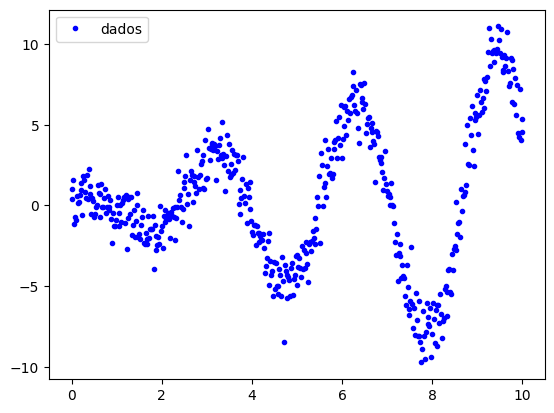

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dados = np.loadtxt('dados.txt')
x = dados[0]
y = dados[1]
plt.plot(x, y, 'bo', markersize=3, label='dados');
plt.legend()
plt.show()

Importando as bibliotecas e definindo a função da equação a ser otimizada pelo método da evolução diferencial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

def Equacao(x,c0,c1,c2,c3,c4,c5,c6):
 return c0+c1*np.sin(x)+c2*np.cos(x)+c3*np.sin(2*x)+c4*np.cos(2*x)+c5*np.sin(3*x)+c6*np.cos(3*x);


Testes com a norma 1:

In [ ]:
#carregando os dados para plotagem
dados = np.loadtxt('dados.txt');
x=dados[0];
y=dados[1];

def modelN1(params):
  sol1= Equacao(x,params[0],params[1],params[2],params[3],params[4],params[5],params[6]);
  e = y-sol1;
  Norma1=np.linalg.norm(e,1);
  erroN1 = Norma1/np.linalg.norm(y,1);
  return [erroN1,sol1,x]

def model_adjN1(x):
  result=modelN1(x);
  return result [0];

bounds = [(-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10)]

result= differential_evolution(model_adjN1, bounds, strategy='best1bin',disp='True');
print(result.x);

erro,sol1,x=modelN1(result.x);

plt.plot(x,y,'bo', label='dados');
plt.plot(x,sol1, label='Modelo');
plt.legend();
plt.show();



Utilizando a função modelN1 foi calculado a norma e o seu valor de erro, a partir dos dados armazenados no vetor x, passado pelo arquivo dados.txt.

A função model_adjN1 utiizou o vetor x passado por parametro, para armazenar os valores de erro, da equação e de x no vetor result, após isso a função retornou o erro de x;

Com o método *differential_evolution* da biblioteca scipy.optimize foi calculado o valor da evolução diferencial para a função(equação) dada.

Assim, o erro da norma 1 encontrado foi:
0.5393872849756317




**O procedimento utilizado para o cálculo da norma 1, do erro da norma1, e da evolução diferencial foi utilizado para as três normas, adaptando a chamada da função np.linalg.norm(), de acordo com a norma pedida**

Testes com a norma 2:

In [ ]:
def modelN2(params):
  sol2= Equacao(x,params[0],params[1],params[2],params[3],params[4],params[5],params[6]);
  e = y-sol2;
  Norma2=np.linalg.norm(e,2);
  erroN2 = Norma2/np.linalg.norm(y,2);
  print(erroN2);
  return [erroN2,sol2,x]

def model_adjN2(x):
  result=modelN2(x);
  return result [0];

bounds = [(-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10)]

result= differential_evolution(model_adjN2, bounds, strategy='best1bin',disp='True');
print(result.x);

erro,sol2,x=modelN2(result.x);

plt.plot(x,y,'bo', label='dados');
plt.plot(x,sol2, label='Modelo');
plt.legend();
plt.show();


Para a norma 2 o erro foi: 0.5191826557624298

Testes com norma no infinito:

In [ ]:
def ModelInf(params):
  solInf=Equacao(x,params[0],params[1],params[2],params[3],params[4],params[5],params[6]);
  e= y-solInf;
  Norma_Inf=np.linalg.norm(e,np.inf);
  erro_normaInf = Norma_Inf/np.linalg.norm(y,np.inf);
  print(erro_normaInf);
  return [erro_normaInf, solInf, x];

def model_adjInf(x):
  result = ModelInf(x);
  return result[0];

bounds = [(-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10)]

result= differential_evolution(model_adjInf, bounds, strategy='best1bin',disp='True');
print(result.x);

erro,solInf,x=modelN2(result.x);

plt.plot(x,y,'bo', label='dados');
plt.plot(x,solInf, label='Modelo');
plt.legend();
plt.show();




Para a norma no infinito o erro encontado foi de:
0.5583806092679134

**Comparação entre os gráficos:**

Erro da norma 1: 0.5393872849756317
Erro da norma 2: 0.5191826557624298
Erro da norma no infinito: 0.5583806092679134


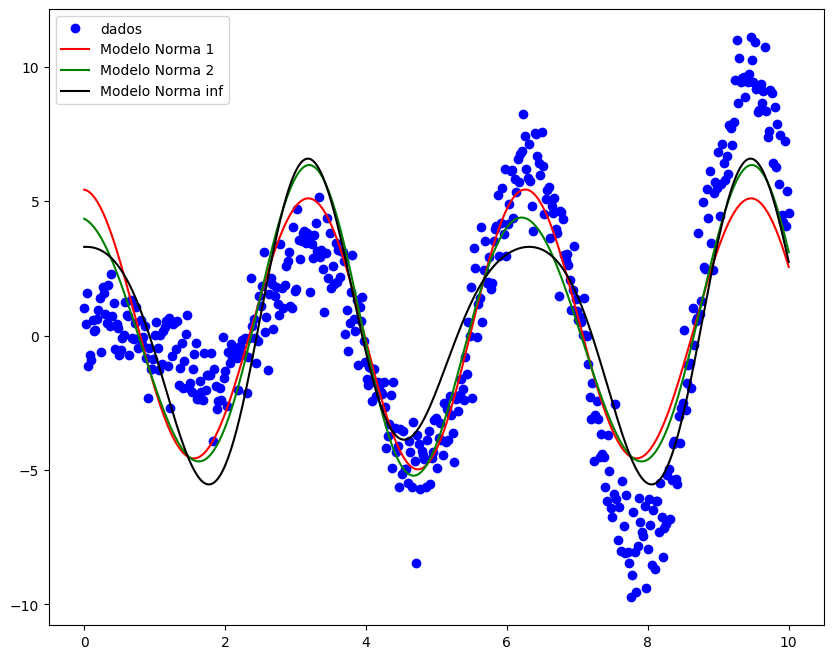

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x, y,'bo', label='dados');
plt.plot(x, sol1, 'r', label='Modelo Norma 1');
plt.plot(x, sol2, 'g', label='Modelo Norma 2');
plt.plot(x, solInf, 'black', label='Modelo Norma inf');
plt.legend();
print('Erro da norma 1: 0.5393872849756317');
print('Erro da norma 2: 0.5191826557624298');
print('Erro da norma no infinito: 0.5583806092679134');


#**Conclusão:**
  Assim, comparando os dados de erro das normas e os gráficos conclui-se
que a otimização da norma 1 é a melhor para a função, visto que possui o menor erro e desvio.